<h3><center> Module 1 Technique Practice <br> 
Akshay Vibhute <br>Jay Thombre <br> Neha Naik <br>
Sudindra Karkera<br>Instructor: Samarasinghe, Kasun <br>
Date: 17 April,2023 </h3>

#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

###### Importing the dataset

In [2]:
df = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


###### Renaming the columns

In [10]:
df2 = df.rename(columns={'CustomerID': 'Customer_ID', 'Churn': 'Churn_Flag', 'Tenure': 'Tenure_Time', 'PreferredLoginDevice': 'Login_Device', 'CityTier': 'Tier_City',
                        'WarehouseToHome': 'Dist_Warehouse_Home','PreferredPaymentMode': 'Payment_Mode', 'Gender': 'Gender', 'HourSpendOnApp': 'Hours_App',
                        'NumberOfDeviceRegistered': 'Registered_Devices', 'PreferedOrderCat': 'Order_Category','SatisfactionScore': 'SatisfactionScore','MaritalStatus': 'MaritalStatus',
                        'NumberOfAddress': 'Number_Address','Complain': 'Complain','OrderAmountHikeFromlastYear': 'Percentage_Increase_Last_Year', 'CouponUsed': 'Coupon_Used_LM',
                        'OrderCount': 'Order_Count', 'DaySinceLastOrder': 'Days_LO','CashbackAmount': 'Average_Cashback'})
df2.head()

,Customer_ID,Churn_Flag,Tenure_Time,Login_Device,Tier_City,Dist_Warehouse_Home,Payment_Mode,Gender,Hours_App,Registered_Devices,Order_Category,SatisfactionScore,MaritalStatus,Number_Address,Complain,Percentage_Increase_Last_Year,Coupon_Used_LM,Order_Count,Days_LO,Average_Cashback
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


#### Question 1:  Data dictionary - what do the features mean and what is type of the data?

In [11]:
df_dict = pd.read_excel('C:\\Users\\naikn\\ALY6040\\E_Commerce_Dataset.xlsx', sheet_name=0)
df_dict.columns = df_dict.iloc[0]
#Kaggle df_dict = df_dict[1:].reset_index()
df_dict[['Variable','Short_Description','Type','Notes']].style
#df_dict
#df_dict[['Variable','Description']]

0,Variable,Short_Description,Type,Notes
0,Variable,Short_Description,Type,Notes
1,Customer_ID,Unique customer ID,Integer,"Unique customerID refers to a distinct identifier used to uniquely identify individual customers in a dataset, database, or system."
2,Churn_Flag,Churn Flag,Integer,"A churn flag is a binary indicator used in e-commerce to identify customers who are at risk of churning based on factors such as purchase history, customer feedback, and engagement."
3,Tenure_Time,Tenure of customer in organization,Integer,The length of time a customer stays with a company is referred to as customer tenure or the duration of the customer's relationship with the organization.
4,Login_Device,Preferred login device of customer,Text,The device that a customer usually uses to log in to a website or application is referred to as their preferred login device. This is the device they find the most convenient for accessing the service.
5,Tier_City,City tier,Integer,"The classification of cities based on their population size, economic development, and other factors is known as city tier. This categorization is often used in marketing and business strategies."
6,Dist_Warehouse_Home,Distance in between warehouse to home of customer,Integer,"The distance between a customer's home and the warehouse is known as the warehouse-to-home distance, which can impact the cost and speed of product delivery."
7,Payment_Mode,Preferred payment method of customer,Text,"The payment method that a customer favors over others is known as their preferred payment method, and it may include options like credit cards, digital wallets, or bank transfers."
8,Gender,Gender of customer,Integer,"The biological and societal characteristics that define a customer as male, female, or non-binary are collectively known as their gender, which can be an important factor in marketing and customer segmentation strategies."
9,Hours_App,Number of hours spend on mobile application or website,Integer,"The amount of time a customer spends on a mobile app or website is referred to as their usage time, and it can be used by businesses to evaluate engagement levels and make improvements to their digital offerings"


#### Question 2:  What is your use-case trying to solve?

E-commerce is a thriving market today, driven by the exponential growth of online shopping due to the internet's expansion and the convenience it offers to customers. The abundance of data generated from online transactions, including purchase patterns, customer preferences, demographics, geographic locations, and payment methods, makes it an intriguing domain for analysis to improve business operations, customer experiences, and overall profitability. Our project focuses on customer churn in e-commerce as it can help businesses identify reasons for customer attrition, implement effective retention strategies, and foster customer loyalty, resulting in sustained growth and repeat purchases.

The dataset used in this study is obtained from a renowned online retailer through Kaggle as the data source. Many ecommerce businesses today face the challenge of identifying customers who are likely to churn, in order to offer them special incentives. The objective of this use-case is to address customer churn in ecommerce companies, where customers discontinue transactions or cancel subscriptions, which can result in revenue loss, market share decline, and decreased customer loyalty. Hence, our aim is to develop a machine learning-based ecommerce churn prediction tool that organizations can use to enhance revenue, improve customer retention, and gain a competitive advantage.

##### Question 3: What did you do with the data in the context of exploration?

Data exploration is a crucial step in the data analysis process, which involves examining and understanding the data at hand. Here are some steps that we took during data exploration.
Data Familiarization: To know the data, we reviewed the data documentation, prepared the data dictionary in Excel, and then imported it in python. As we have extracted the data from Kaggle, our source of the data is Kaggle, and the format of the data is Excel file.
Descriptive Statistics: We computed and analyzed descriptive statistics such as mean, median, mode, standard deviation, and percentiles to summarize the central tendency and dispersion to understand the distribution of the data. We used summary () and describe () functions to get the details about the data.
Data Visualization: We used box plots and heatmaps to explore the data visually and gain insights into patterns, trends, and relationships within the data.
Data Cleaning: We observed many missing values and outliers in our data. We used the MICE Multiple Imputation by Chained Equations method to input missing values and used the z-score methods to get rid of outliers. 
Data Relationships: To explore relationships between variables using functions corr (), to understand how numerical variables are related to each other.
Feature Engineering: We created new features AvgTimeSpent to find average time spent by every user and transform existing categorical features using one hot encoding. 



#### Question 4: How many entries are in the dataset?

In [12]:
# Get the total number of rows (i.e., shape[0])
total_rows = df.shape[0]

# Print the total number of rows
print("Total number of rows:", total_rows)

Total number of rows: 5630


(D’Agostino, 2022)

#### Question 5: Was there missing data? Duplications? How clean was the data?

1) Descriptive Statistics functions like summary function helped us find the nulls values in every field. 

2) We used df.duplicated() function and found no duplicates 

###### Descriptive Statistics

In [ ]:
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()

In [13]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [14]:
summary('data',df2)


data shape: (5630, 20)


,dtypes,null,unique,min,median,max,mean,std
Customer_ID,int64,0,5630,50001,52815.50,55630,52815.500000,1625.385339
Churn_Flag,int64,0,2,0,0.00,1,0.168384,0.374240
Tenure_Time,float64,264,36,0.0,9.00,61.0,10.189899,8.557241
Login_Device,object,0,3,Computer,NaN,Phone,NaN,NaN
Tier_City,int64,0,3,1,1.00,3,1.654707,0.915389
Dist_Warehouse_Home,float64,251,34,5.0,14.00,127.0,15.639896,8.531475
Payment_Mode,object,0,7,CC,NaN,UPI,NaN,NaN
Gender,object,0,2,Female,NaN,Male,NaN,NaN
Hours_App,float64,255,6,0.0,3.00,5.0,2.931535,0.721926
Registered_Devices,int64,0,6,1,4.00,6,3.688988,1.023999


In [15]:
duplicate_rows = df2.duplicated()

In [16]:
# Print duplicate rows
print("Duplicate Rows:")
print(df2[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [Customer_ID, Churn_Flag, Tenure_Time, Login_Device, Tier_City, Dist_Warehouse_Home, Payment_Mode, Gender, Hours_App, Registered_Devices, Order_Category, SatisfactionScore, MaritalStatus, Number_Address, Complain, Percentage_Increase_Last_Year, Coupon_Used_LM, Order_Count, Days_LO, Average_Cashback]
Index: []


(Prajwal CN, 2022)

#### Question 6: Were there outliers or suspicious data?

We used boxplots to find outliers among all our numerical variables. We observed that variables Coupons Used Last month and Total Order count variables have highest outliers. Variables like Tenure_time and Distance between warehouse and home has lowest outliers


###### Box Plot to find the outliers

In [17]:
cats= ['Login_Device', 'Payment_Mode', 'Gender', 'Order_Category', 'MaritalStatus']
ordinal = ['Tier_City', 'SatisfactionScore']
binary = ['Churn_Flag', 'Complain']
nums = df2.loc[:, ~df2.columns.isin(cats + binary + ordinal)].columns[1:]
#df[cats].describe()

In [18]:
file_dict = {}

for col in cats:
    #fig, ax = plt.subplots(figsize=(8, 8))
    file_dict[col] = df2[col].value_counts().rename_axis(col).reset_index(name='Counts')

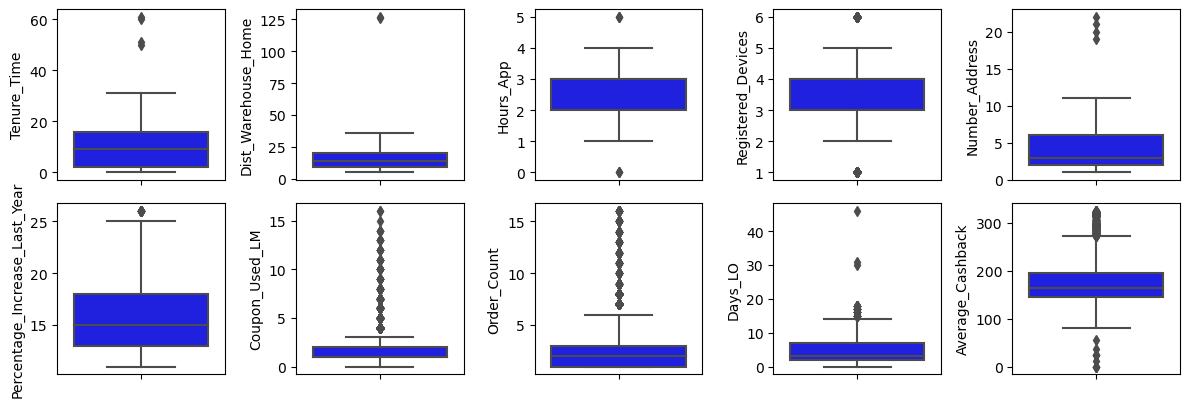

In [19]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df2[nums[i]], color='blue')
    plt.tight_layout()

(Harmadi, 2021)

#### Question 7: What did you find? What intrigued you about the data? Why does that matter?

Due to the vast amount of information available from online transactions such as purchase patterns, preferences, customer demographics, geographic locations, and payment methods, this data can be used by the business to target specific audiences with personalized marketing campaigns.

Therefore, we decided to use the e-commerce domain for our project. Out of the many areas where business can use the ecommerce data, Understanding and managing customer churn can help ecommerce businesses identify reasons for customer attrition, improve customer retention strategies, and ultimately reduce customer turnover, leading to increased customer loyalty, repeat purchases, and sustained business growth.

Based on the below graphs provided, we can gather that the typical duration of customer engagement on the e-commerce website falls within the range of 1 to 18 months, with an average of 10 months. Additionally, the distance between the customer's home and the warehouse generally ranges from 5 to 20 miles, with an average of 10 miles.
Further analysis of the dataset reveals that customers spend an average of 2 hours on the application or website, with a typical range of 2 to 3 hours. Customers also tend to have multiple devices registered with the website, usually ranging from 3 to 4 devices. Similarly, customers have multiple registered addresses, with an average of 2 addresses per customer.
According to the data, the number of orders has increased by an average of 15%, ranging from 8 to 17%, over the past year. Additionally, customers tend to use an average of 2 coupons for their purchases. The average number of days since a customer's last order is 2 days.
Lastly, the cashback that customers receive on the website ranges from 150 to 200, with an average cashback of 160. Overall, these insights provide valuable information for understanding customer behavior and trends in the e-commerce market.

In this data there total 5630 entries. From the exploratory data analysis, we can understand that most number of users logged in to the e commerce site via their mobile phones and the number of users are 2765. From payment data, we can understand that Most number of users paid via their debit cards and the count is 2314 and least number of users paid via cash on delivery payment method and count is 149. In this dataset, majority of users are men. In product category, most number of users ordered Laptop and accessories and count is 2050 and least orders were placed for other products category. 2986 of the total users of the e commerce website are married and least number of users are married.

From the correlation matrix, we find many interesting correlations amongst the numerical variables. One interesting correlation is between Tenure_time and Average cashback . This implies that as the customers shop continuosly from our ecommerce site , they get additional offers, coupons and hence additioncal cashback

Lastly, by using the customer churn rate calculations, we find that tier_3 has the maximum churn rate and single people tend to switch between ecommerce websites causing an increase in their churn rates. These facts are interesting because it will help to plan marketing strategies especially for tier_3 cities or single people.


###### Categorical Data Distribution

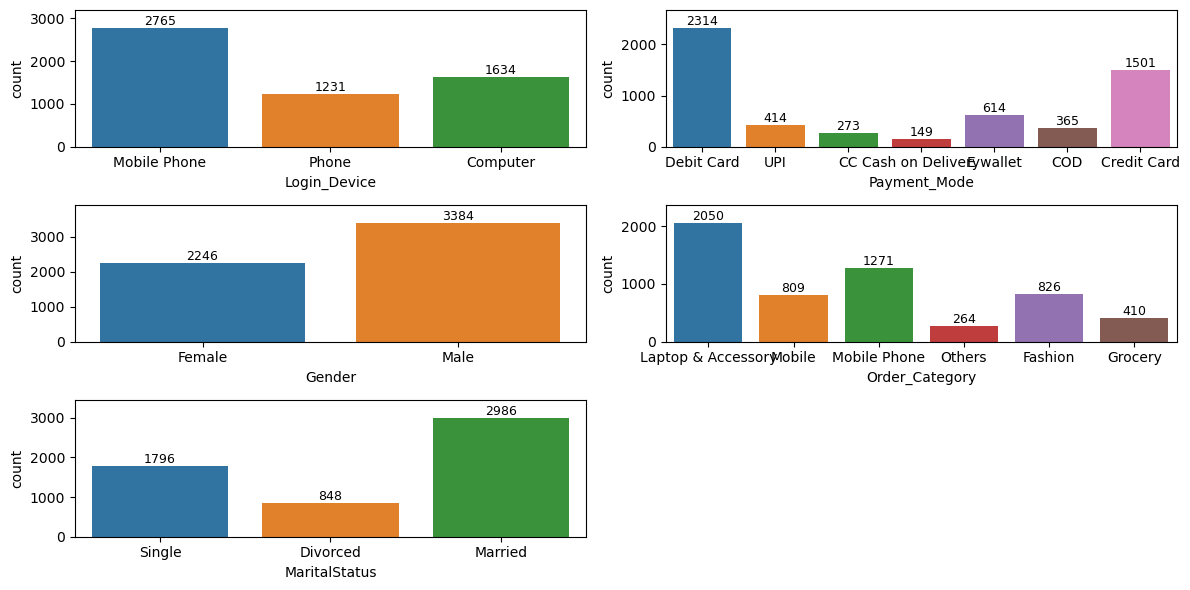

In [20]:
plt.figure(figsize=(12,6))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df2[cats[i]])
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

###### Correlation Matrix Between numerical variables

<AxesSubplot:>

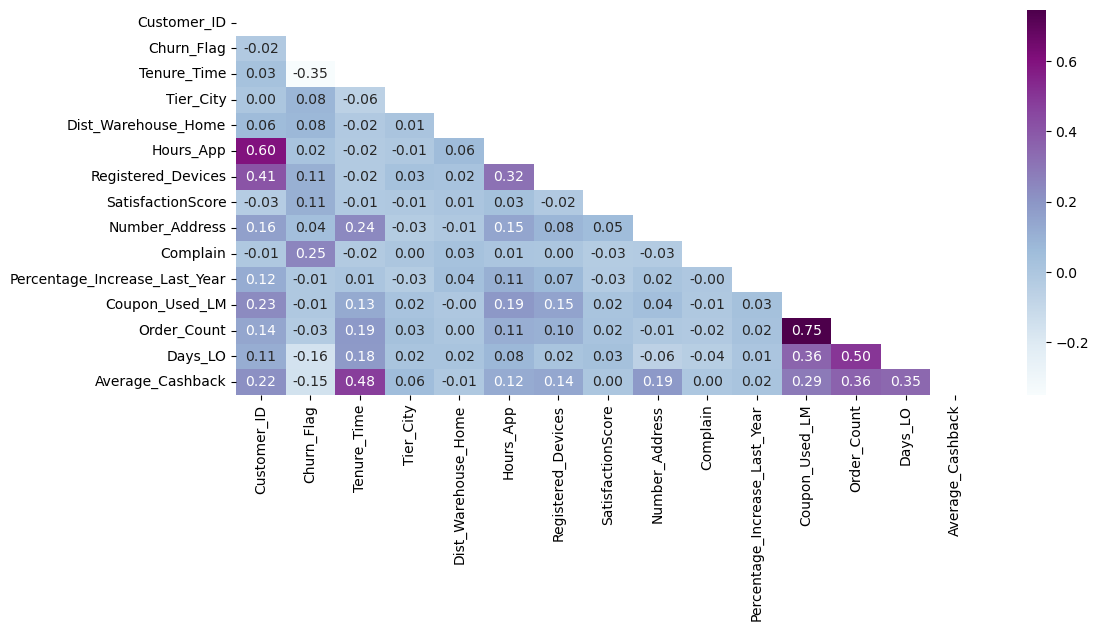

In [21]:
plt.figure(figsize=(12,5))
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap(df2.corr(), mask=mask, annot=True, fmt='.2f', cmap="BuPu")

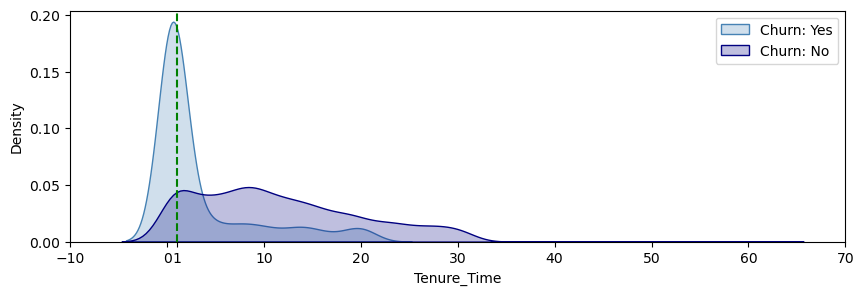

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df2[df2['Churn_Flag'] == 1]['Tenure_Time'].dropna(), shade=True,color= 'steelblue', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df2[df2['Churn_Flag'] == 0]['Tenure_Time'].dropna(), shade=True,color= 'navy', label= 'Churn: No', ax=ax)
plt.axvline(x=1, ls='--', color='green')
x_ticks = np.append(ax.get_xticks(), 1)
ax.set_xticks(x_ticks)
plt.legend(loc = 1)

###### Relationship between categorical variables and churn flag 

In [23]:
def churn_plot(x, data):
    df_cats = data.copy()
    df_city = df_cats.groupby(x)['Customer_ID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn_Flag'])['Customer_ID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    df_merge = df_merge[df_merge['Churn_Flag'] == 1]
    return df_merge

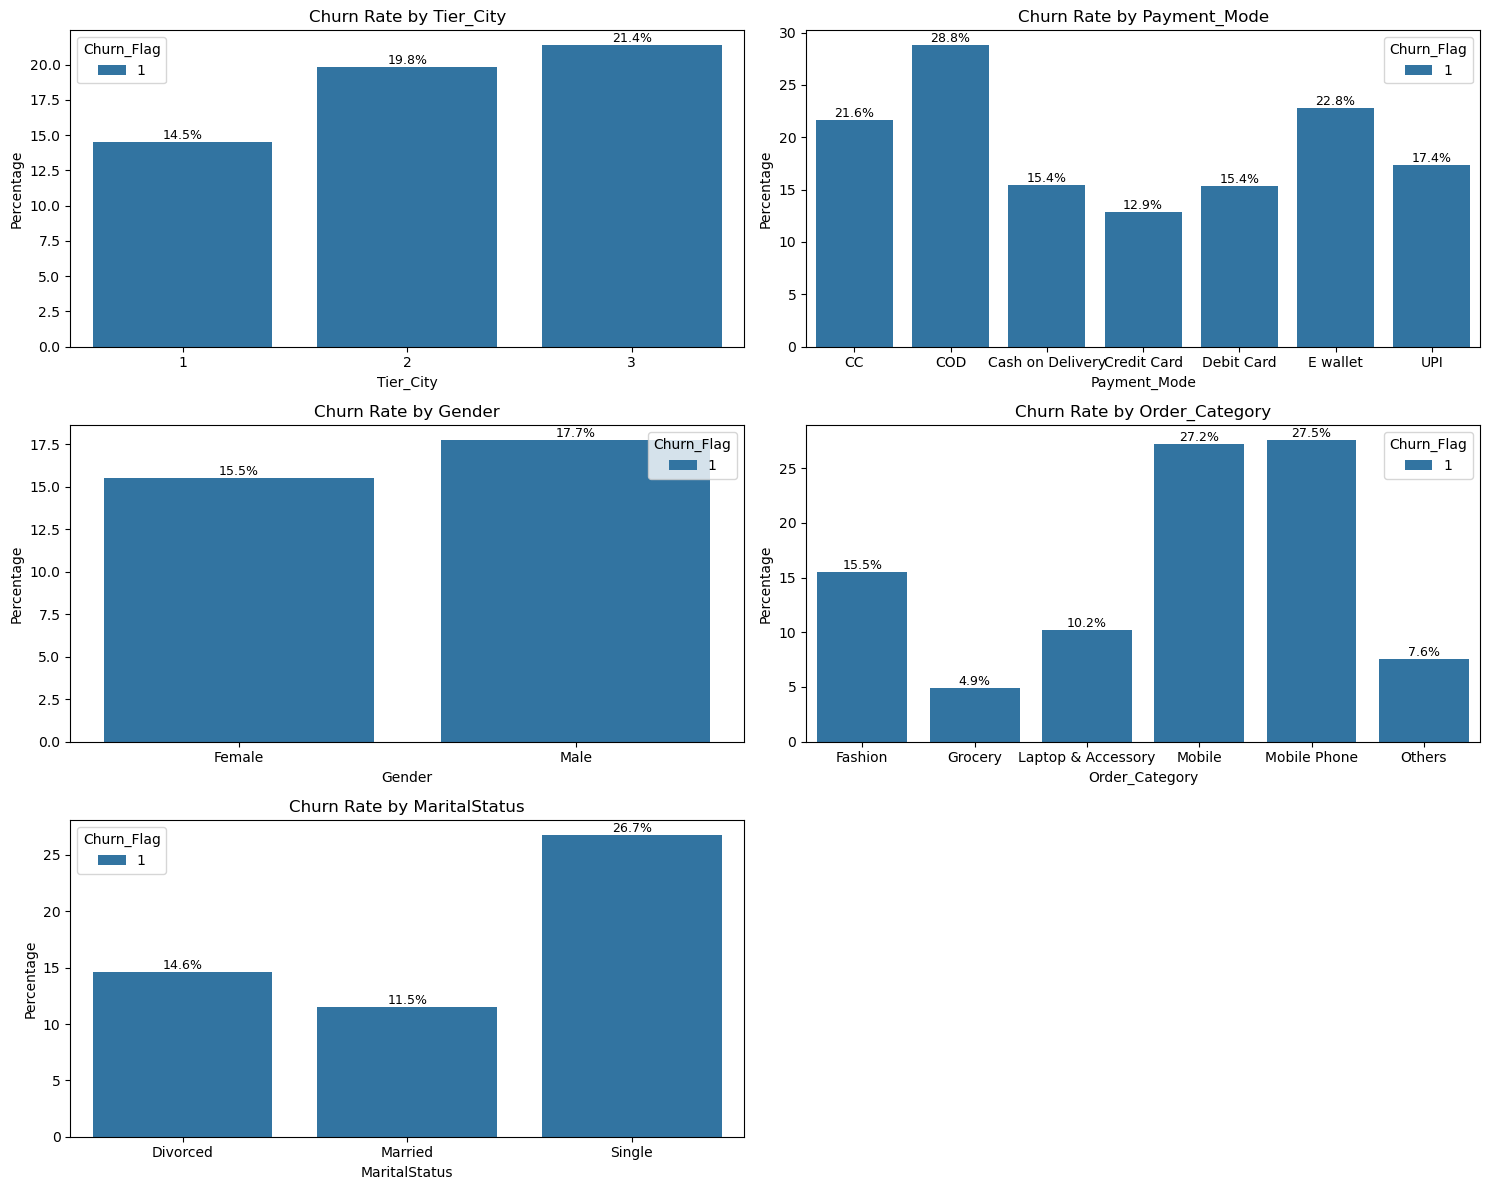

In [31]:
categorical_columns = ['Tier_City', 'Payment_Mode', 'Gender', 'Order_Category', 'MaritalStatus']
plt.figure(figsize=(15,12))
for i in range(0, len(categorical_columns)):
    plt.subplot(3, 2, i+1)
    data = churn_plot(categorical_columns[i], df2)
    ax = sns.barplot(x=categorical_columns[i], y='Percentage', data=data, hue = 'Churn_Flag')
    ax.set_title(f'Churn Rate by {categorical_columns[i]}')

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        #ax.set_ylim(top=105)
        #ax.legend(loc='center right', title='Churn_Flag')
    plt.tight_layout()

###### Remove NA's using MICE imputation

In [32]:
# Perform MICE imputation
exception_columns = ['Customer_ID','Tier_City', 'Payment_Mode', 'Gender', 'Order_Category', 'MaritalStatus','Churn_Flag']
df_numeric = df2.drop(columns=exception_columns)
df3=df2
from fancyimpute import IterativeImputer
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df3[nums])
df_numeric_imputed = pd.DataFrame(df_imputed, columns=df3[nums].columns)
df3 = pd.concat([df_numeric_imputed, df3[exception_columns]], axis=1)

In [34]:
df2.columns

Index(['Customer_ID', 'Churn_Flag', 'Tenure_Time', 'Login_Device', 'Tier_City',
       'Dist_Warehouse_Home', 'Payment_Mode', 'Gender', 'Hours_App',
       'Registered_Devices', 'Order_Category', 'SatisfactionScore',
       'MaritalStatus', 'Number_Address', 'Complain',
       'Percentage_Increase_Last_Year', 'Coupon_Used_LM', 'Order_Count',
       'Days_LO', 'Average_Cashback'],
      dtype='object')

In [33]:
df3[nums].columns

Index(['Tenure_Time', 'Dist_Warehouse_Home', 'Hours_App', 'Registered_Devices',
       'Number_Address', 'Percentage_Increase_Last_Year', 'Coupon_Used_LM',
       'Order_Count', 'Days_LO', 'Average_Cashback'],
      dtype='object')

###### Remove outliers 

In [27]:
print(f'before: {len(df3)}')

filtered_entries = np.array([True] * len(df3))

for col in nums:
    zscore = abs(stats.zscore(df3[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df4 = df3[filtered_entries]

print(f'after: {len(df4)}')

before: 5630
after: 5350


In [29]:
df4.columns


Index(['Tenure_Time', 'Dist_Warehouse_Home', 'Hours_App', 'Registered_Devices',
       'Number_Address', 'Percentage_Increase_Last_Year', 'Coupon_Used_LM',
       'Order_Count', 'Days_LO', 'Average_Cashback', 'Customer_ID',
       'Tier_City', 'Payment_Mode', 'Gender', 'Order_Category',
       'MaritalStatus', 'Churn_Flag'],
      dtype='object')

###### Check if outliers are removed

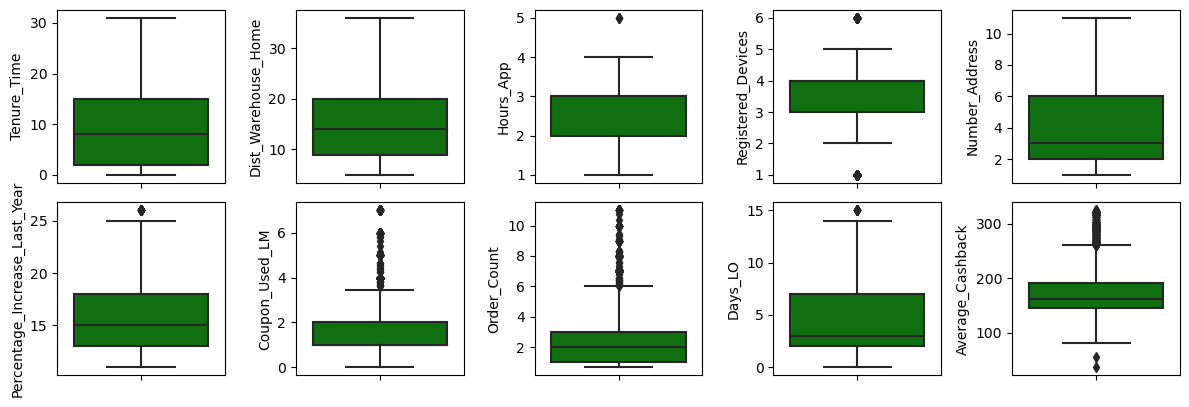

In [28]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df4[nums[i]], color='green')
    plt.tight_layout()

#### Question 8: What would your proposed next steps be? How do you plan to approach the cleansing of the data?

We have performed the required data cleaning and data transforming as per our knowledge of the data so far. Our next steps would be to prepare a machine learning model to pass this data to identify the churn percentage of new customers. Based on the accuracy metric of the models, we will plan our next steps to handle the data. One possible change is the categorical labels transformation using one hot encoding.

#### Question 9:  What feature engineering would you perform?

###### Categorical Variables Transformation

In [68]:
#df4['Login_Device'] = df4['Login_Device'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df4['Payment_Mode'] = df4['Payment_Mode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df4['Order_Category'] = df4['Order_Category'].replace(['Mobile','Mobile Phone', 'Laptop & Accessory'], ['Electronics', 'Electronics', 'Electronics'])

In [69]:
df4 = pd.get_dummies(df4)
df4.head()

,Tenure_Time,Dist_Warehouse_Home,Hours_App,Registered_Devices,Number_Address,Percentage_Increase_Last_Year,Coupon_Used_LM,Order_Count,Days_LO,Average_Cashback,Customer_ID,Tier_City,Complain,Churn_Flag,Complain,Payment_Mode_Cash on Delivery,Payment_Mode_Credit Card,Payment_Mode_Debit Card,Payment_Mode_E wallet,Payment_Mode_UPI,Gender_Female,Gender_Male,Order_Category_Electronics,Order_Category_Fashion,Order_Category_Grocery,Order_Category_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,6.0,3.000000,3.0,9.0,11.0,1.0,1.0,5.0,159.93,50001,3,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,6.454469,8.0,3.000000,4.0,7.0,15.0,0.0,1.0,0.0,120.90,50002,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1
2,6.711164,30.0,2.000000,4.0,6.0,14.0,0.0,1.0,3.0,120.28,50003,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
3,0.000000,15.0,2.000000,4.0,8.0,23.0,0.0,1.0,3.0,134.07,50004,3,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0.000000,12.0,2.645239,3.0,3.0,11.0,1.0,1.0,3.0,129.60,50005,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1


###### Feature Engineering

In [ ]:
df4['AvgTimeSpent'] = df4['Hours_App'] / df4['Registered_Devices']

#### Conclusions

In conclusion, the provided dataset gives insights into the behavior and trends of customers on an e-commerce website. The analysis shows that customer engagement on the website lasts between 1 to 18 months, with an average duration of 10 months. Customers tend to have multiple devices and registered addresses, spend an average of 2 hours on the website, and use an average of 2 coupons per purchase. The number of orders has increased over the past year, and the average time since a customer's last order is 2 days. Moreover, cashback ranges from 150 to 200, with an average of 160. The dataset also highlights that the majority of customers logged in through mobile devices and paid via debit cards. Finally, the most popular product category was Laptop and accessories, and the majority of customers were married. These insights are valuable for e-commerce companies to understand customer behavior and tailor their strategies accordingly.

#### References

D'Agostino, A. (2023, April 4). Exploratory Data Analysis in python - a step-by-step process. Medium. Retrieved April 17, 2023, from https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

CN, P. (2022, August 3). EDA - exploratory data analysis: Using python functions. DigitalOcean. Retrieved April 17, 2023, from https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

Harmadi, A. C. (2021, October 28). 10 things to do when conducting your exploratory data analysis (EDA). Medium. Retrieved April 17, 2023, from https://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812